##### Imports

In [1]:
# Establish connection to Codeup database
from env import host, user, password
import os
import acquire

# functions
import accuracy_precision_recall

# data prep
import prep

# visuals
import figs

# data manipulation
import pandas as pd
import numpy as np

# splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# sklearn for modeling
from sklearn.tree import DecisionTreeClassifier,\
export_text, \
plot_tree
from sklearn.metrics import accuracy_score, \
classification_report, \
confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# modeling
import seaborn as sns
import matplotlib.pyplot as plt


##### Acquisition

In [2]:
# call telco data
df = acquire.get_telco_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

##### Preparation

In [4]:
train, validate, test = prep.prep_telco(df)
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 9)
validate -> (1691, 9)
test -> (1409, 9)


In [5]:
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,churn,is_male,has_partner,has_dependents
5310,7503-MIOGA,1,72,89.85,6697.35,No,0,1,0
3790,5329-KRDTM,1,72,77.35,5396.25,No,1,1,0
4398,6199-IWKGC,1,46,100.25,4753.85,No,0,1,0
2635,3748-FVMZZ,0,4,40.05,162.45,No,1,0,0
2986,4280-DLSHD,0,8,54.75,445.85,No,1,1,0


##### Exploration

has_partner:
count    3943.000000
mean        0.486685
std         0.499886
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: has_partner, dtype: float64

has_dependents:
count    3943.000000
mean        0.307634
std         0.461573
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: has_dependents, dtype: float64

is_male:
count    3943.000000
mean        0.509003
std         0.499982
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: is_male, dtype: float64



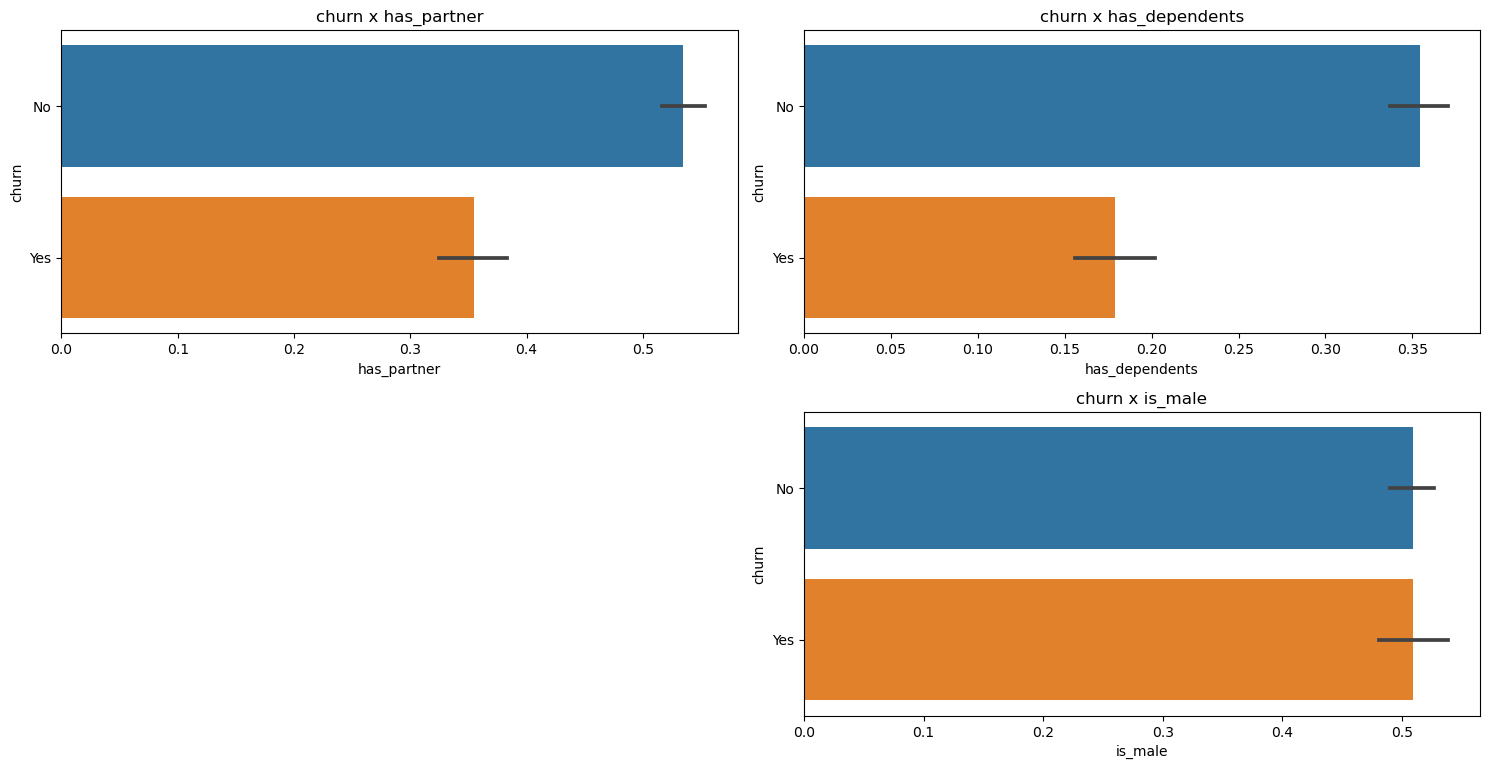

In [6]:
# visualize columns of interest
figs.figs(train)

##### Modeling

In [7]:
# Create baseline prediction column 0 = 'no churn'
train['baseline_prediction'] = '0'

In [8]:
# Verify column was created
train.head()

,customer_id,senior_citizen,tenure,monthly_charges,total_charges,churn,is_male,has_partner,has_dependents,baseline_prediction
5310,7503-MIOGA,1,72,89.85,6697.35,No,0,1,0,0
3790,5329-KRDTM,1,72,77.35,5396.25,No,1,1,0,0
4398,6199-IWKGC,1,46,100.25,4753.85,No,0,1,0,0
2635,3748-FVMZZ,0,4,40.05,162.45,No,1,0,0,0
2986,4280-DLSHD,0,8,54.75,445.85,No,1,1,0,0


In [11]:
# identify x and y columns
X_cols = train.columns
y_cols = 'churn'

In [13]:
# drop churn and unecessary columns out of X_cols:
drop_cols = ['churn'
             , 'senior_citizen'
             , 'customer_id'
             , 'tenure'
             , 'monthly_charges'
             , 'total_charges']

X_cols = (X_cols.drop(drop_cols))

In [14]:
X_cols

Index(['is_male', 'has_partner', 'has_dependents', 'baseline_prediction'], dtype='object')

In [15]:
# make DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [16]:
# verify
clf

DecisionTreeClassifier()

In [17]:
# fit
clf.fit(train[X_cols], train[y_cols])

DecisionTreeClassifier()

In [18]:
# use decision tree to make first model
model_1_preds = clf.predict(train[X_cols])

In [19]:
# make second model
clf1 = DecisionTreeClassifier(max_depth=2)
# fit
clf1.fit(train[X_cols],train[y_cols])
# use
model_2_preds = clf1.predict(train[X_cols])

In [20]:
clf1.score(train[X_cols],train[y_cols])

0.7347197565305605

In [21]:
clf2 = DecisionTreeClassifier(max_depth=1)

clf2.fit(train[X_cols],train[y_cols])

model_3_preds = clf2.predict(train[X_cols])

In [22]:
train[X_cols].head(2)

,is_male,has_partner,has_dependents,baseline_prediction
5310,0,1,0,0
3790,1,1,0,0


In [23]:
# accuracy lil more like we saw before
accuracy_score(train[y_cols], model_3_preds)

0.7347197565305605

In [24]:
clf2.score(train[X_cols], train[y_cols])

0.7347197565305605

[Text(0.5, 0.875, 'has_dependents <= 0.5\ngini = 0.39\nsamples = 3943\nvalue = [2897, 1046]\nclass = No'),
 Text(0.25, 0.625, 'has_partner <= 0.5\ngini = 0.431\nsamples = 2730\nvalue = [1871, 859]\nclass = No'),
 Text(0.125, 0.375, 'is_male <= 0.5\ngini = 0.454\nsamples = 1811\nvalue = [1179, 632]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.465\nsamples = 893\nvalue = [564, 329]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.442\nsamples = 918\nvalue = [615, 303]\nclass = No'),
 Text(0.375, 0.375, 'is_male <= 0.5\ngini = 0.372\nsamples = 919\nvalue = [692, 227]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.332\nsamples = 442\nvalue = [349, 93]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.404\nsamples = 477\nvalue = [343, 134]\nclass = No'),
 Text(0.75, 0.625, 'has_partner <= 0.5\ngini = 0.261\nsamples = 1213\nvalue = [1026, 187]\nclass = No'),
 Text(0.625, 0.375, 'is_male <= 0.5\ngini = 0.322\nsamples = 213\nvalue = [170, 43]\nclass = No'),
 Text(0.5625, 0.125, 'gini = 0.326\nsamples

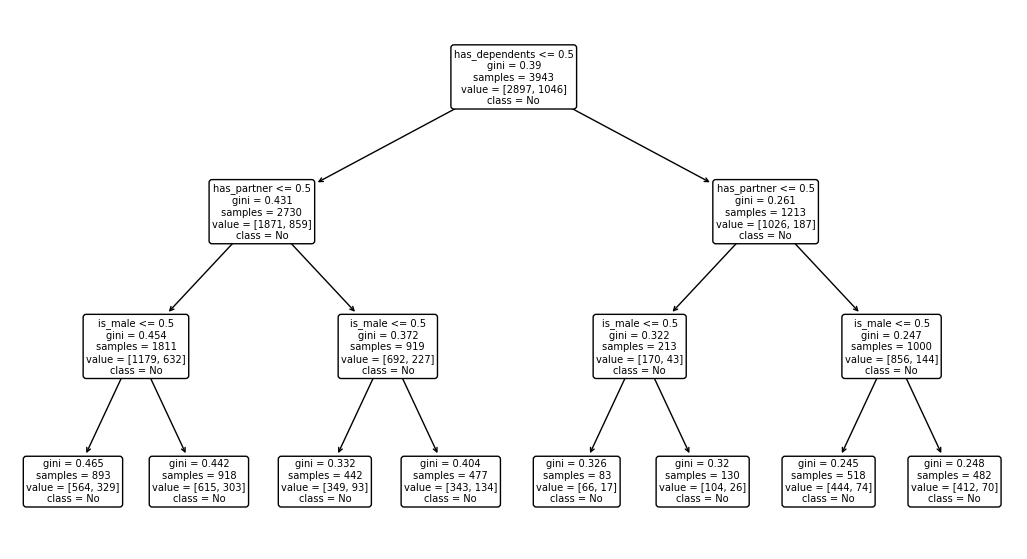

In [25]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_cols, class_names=clf.classes_, rounded=True)

In [26]:
clf.score(train[X_cols],train[y_cols])

0.7347197565305605

In [32]:
# classification report:
print(classification_report(train[y_cols],
                      model_2_preds))

              precision    recall  f1-score   support

          No       0.73      1.00      0.85      2897
         Yes       0.00      0.00      0.00      1046

    accuracy                           0.73      3943
   macro avg       0.37      0.50      0.42      3943
weighted avg       0.54      0.73      0.62      3943



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
